# Time series analysis

Link to course: [Datacamp](https://campus.datacamp.com/courses/time-series-analysis-in-python).



In [1]:
import math
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

# Correlation

In [2]:
stocks_and_bonds = pd.read_csv('../data/stocks_and_bonds.csv')
stocks_and_bonds.set_index('observation_date', inplace=True)
stocks_and_bonds.index = pd.to_datetime(stocks_and_bonds.index)
stocks_and_bonds.head()

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


In [3]:
returns = stocks_and_bonds.pct_change()
returns.head()

,SP500,US10Y
observation_date,,
2007-06-11,NaN,NaN
2007-06-12,-0.010682,0.023346
2007-06-13,0.015184,-0.011407
2007-06-14,0.004816,0.005769
2007-06-15,0.006527,-0.013384


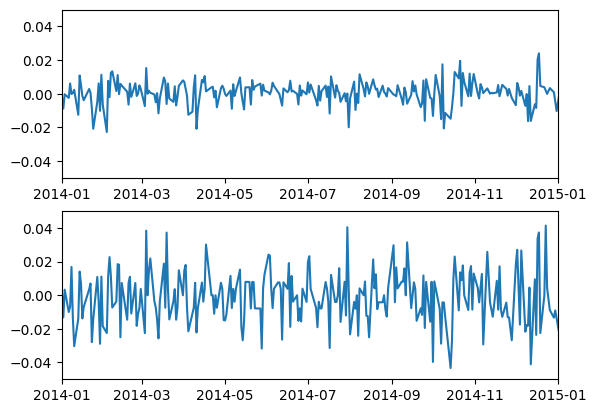

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(returns['SP500'])
ax2.plot(returns['US10Y'])
ax1.set_xlim([datetime(2014, 1, 1), datetime(2015, 1, 1)])
ax2.set_xlim([datetime(2014, 1, 1), datetime(2015, 1, 1)])
ax1.set_ylim((-0.05, 0.05))
ax2.set_ylim((-0.05, 0.05))
plt.show()

In [5]:
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:  0.4119448886249272


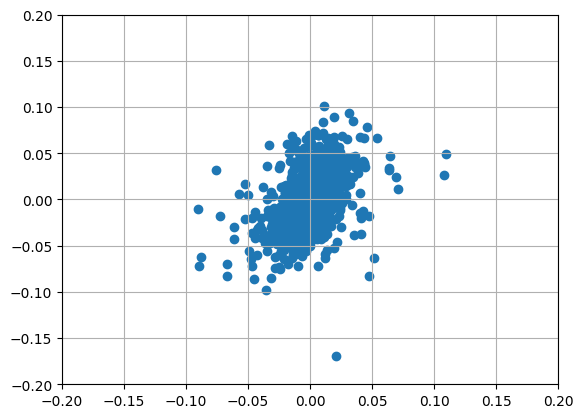

In [6]:
plt.scatter(returns['SP500'], returns['US10Y'])
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.grid(True)
plt.show()

# Linear regression

In [7]:
df = pd.read_csv('../data/regression_example_data.csv')
df.head()

,x,y
0,1.281155,-0.835129
1,-0.612631,-0.061004
2,0.933222,-0.194677
3,2.269327,-2.461142
4,-1.427691,1.040073


In [8]:
x = df['x']
y = df['y']

## Statsmodels

In [9]:
df1 = sm.add_constant(df['x'].to_frame())
mdl_1 = sm.OLS(y, df1).fit()
print(mdl_1.params)
print(mdl_1.summary())

const   -0.005248
x       -0.907995
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:21:28   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

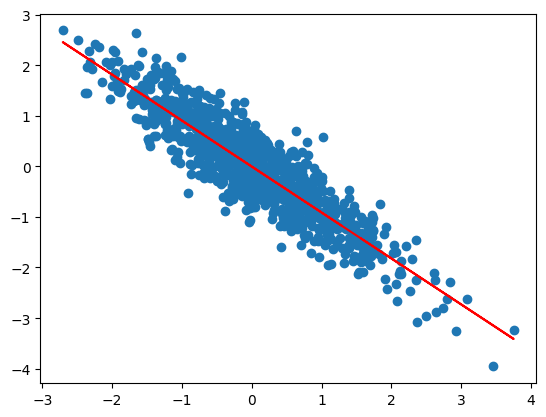

In [10]:
plt.scatter(x, y)
line_ys = mdl_1.params.const + mdl_1.params.x * x
plt.plot(x, line_ys, color="red")
plt.show()

## Numpy

In [11]:
mdl_2 = np.polyfit(x, y, deg=1)
assert abs(mdl_2[0] - mdl_1.params.x) < 1e-5
assert abs(mdl_2[1] - mdl_1.params.const) < 1e-5
mdl_2

array([-0.90799455, -0.00524843])

## Scipy

In [12]:
mdl_3 = scipy.stats.linregress(x, y)
assert abs(mdl_3.slope - mdl_1.params.x) < 1e-5
assert abs(mdl_3.intercept - mdl_1.params.const) < 1e-5
mdl_3

LinregressResult(slope=np.float64(-0.9079945467703993), intercept=np.float64(-0.005248433747844339), rvalue=np.float64(-0.9041749130497253), pvalue=np.float64(0.0), stderr=np.float64(0.01357871106000874), intercept_stderr=np.float64(0.013413804850284889))

# Auto-correlation

In [13]:
df = pd.read_csv('../data/stocks_and_bonds.csv')
df.set_index('observation_date', inplace=True)
df.index = pd.to_datetime(df.index)
sp500 = df['SP500']
sp500.head()

observation_date
2007-06-11    1509.12
2007-06-12    1493.00
2007-06-13    1515.67
2007-06-14    1522.97
2007-06-15    1532.91
Name: SP500, dtype: float64

In [14]:
sp500_monthly = sp500.resample(rule='M').last()
sp500_monthly = sp500_monthly.pct_change()
sp500_monthly.head()

/var/folders/v5/z5qxtfgd0q94vbf__ysbzf9w0000gn/T/ipykernel_53099/1776276108.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sp500_monthly = sp500.resample(rule='M').last()


observation_date
2007-06-30         NaN
2007-07-31   -0.031982
2007-08-31    0.012864
2007-09-30    0.035794
2007-10-31    0.014822
Freq: ME, Name: SP500, dtype: float64

In [15]:
auto_correlation = sp500_monthly.autocorr()  # lag 1
auto_correlation

np.float64(0.15437392286678953)

 # Auto-correlation function (ACF)

In [16]:
df = pd.read_csv('../data/earnings_timeseries.csv')
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,Earnings
Date,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


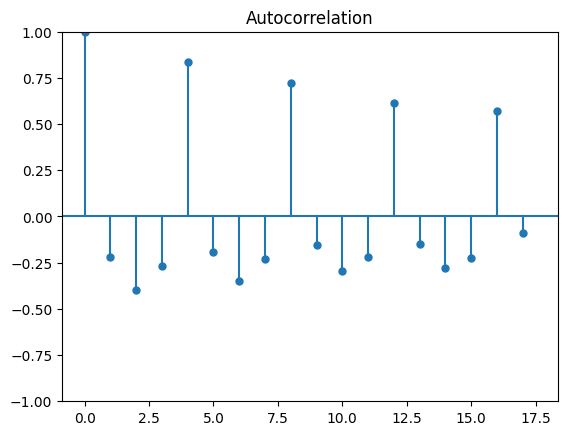

In [17]:
acf_array = acf(df)
print(acf_array)
plot_acf(df, alpha=1)
plt.show()

## Confidence intervals

The auto-correlation for lag = 1 is -0.24
The approximate confidence interval for lag = 1 is +/- 0.30


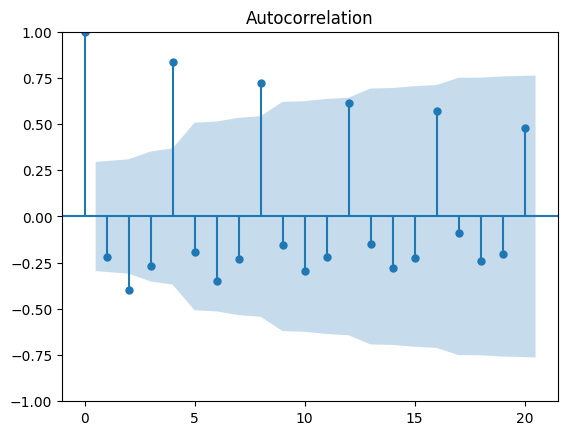

In [18]:
auto_correlation = df['Earnings'].autocorr()
print(f"The auto-correlation for lag = 1 is {auto_correlation:4.2f}")

# Approximate confidence interval
# 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean
n_obs = len(df)
conf = 1.96 / math.sqrt(n_obs)
print(f"The approximate confidence interval for lag = 1 is +/- {conf:4.2f}")

# Plot the auto-correlation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(df['Earnings'], alpha=0.05, lags=20)
plt.show()

# White noise


The mean is 0.022 and the standard deviation is 0.050


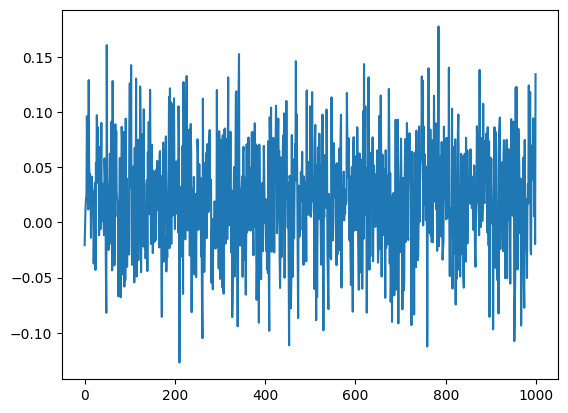

In [19]:
# Generate white noise series
series = np.random.normal(loc=0.02, scale=0.05, size=1000)
mean = np.mean(series)
std = np.std(series)
print("The mean is %5.3f and the standard deviation is %5.3f" % (mean, std))
plt.plot(series)
plt.rcParams["figure.figsize"] = (12, 6)
plt.show()

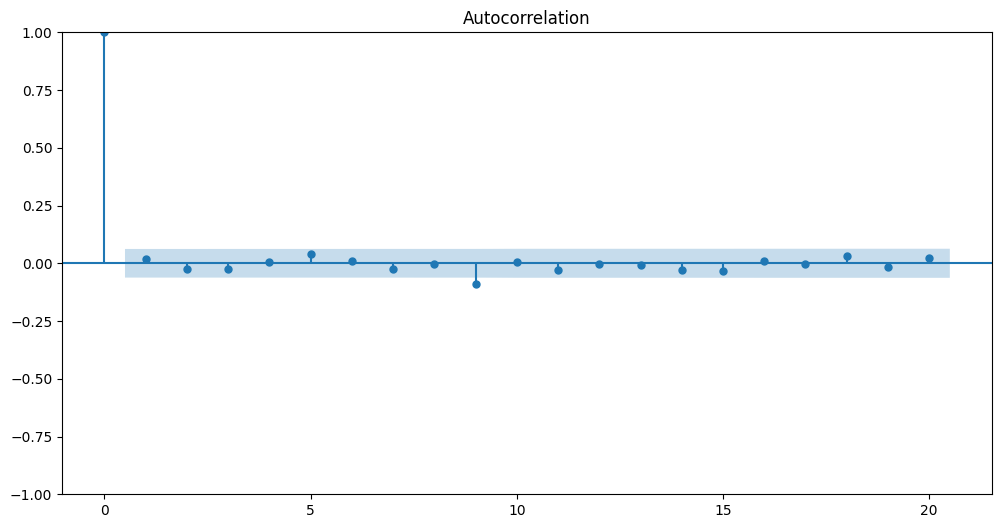

In [20]:
# Plot auto-correlation function of white noise returns
plot_acf(series, lags=20)
plt.show()

# Random walk 

## Random walk - stock example

In [21]:
# Generate several random walks
steps = np.random.normal(loc=0, scale=1, size=(10, 500))
steps[:, 0] = 0  # Use zero return to start at same point
prices = 100 + np.cumsum(steps, axis=1)

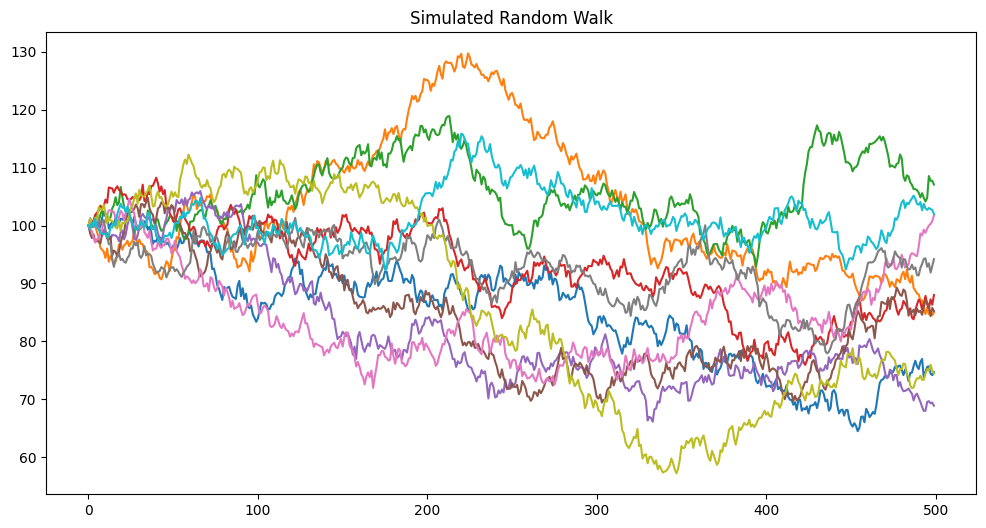

In [22]:
# Plot 
for i in range(10):
    plt.plot(prices[i, :])
plt.title("Simulated Random Walk")
plt.show()

## Random walk with drift

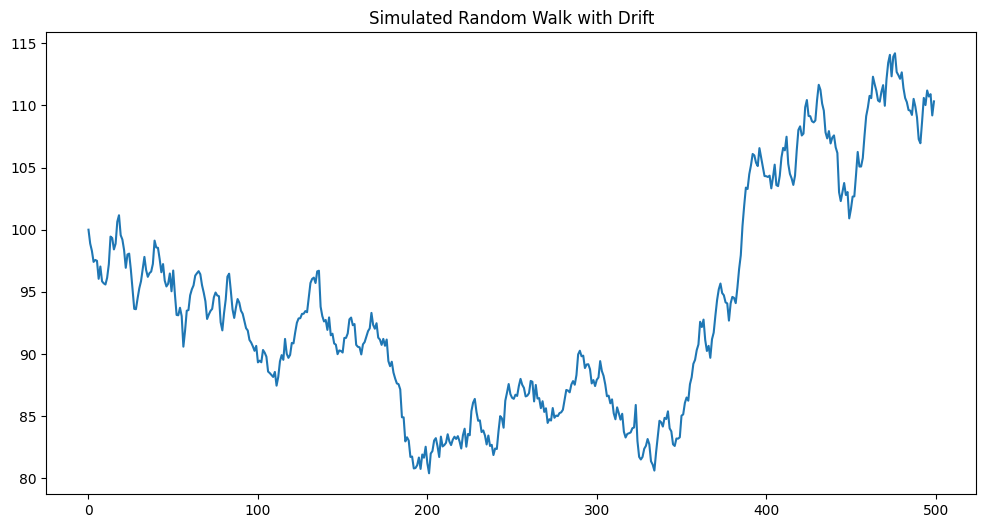

In [23]:
# Sample returns, generate prices
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1
steps[0] = 1  # Set 1st element to neutral
P = 100 * np.cumprod(steps)

# Plot
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

# Augmented Dickey-Fuller (ADF) test

In [24]:
results = adfuller(df['Earnings'])
print(f'The p-value of the test on prices is {results[1] * 100:.4f} %')

The p-value of the test on prices is 5.0803 %


In [25]:
results = adfuller(returns['SP500'].iloc[1:])
print(f'The p-value of the test on prices is {results[1] * 100:.4f} %')


The p-value of the test on prices is 0.0000 %


# Stationarity

# AR processes

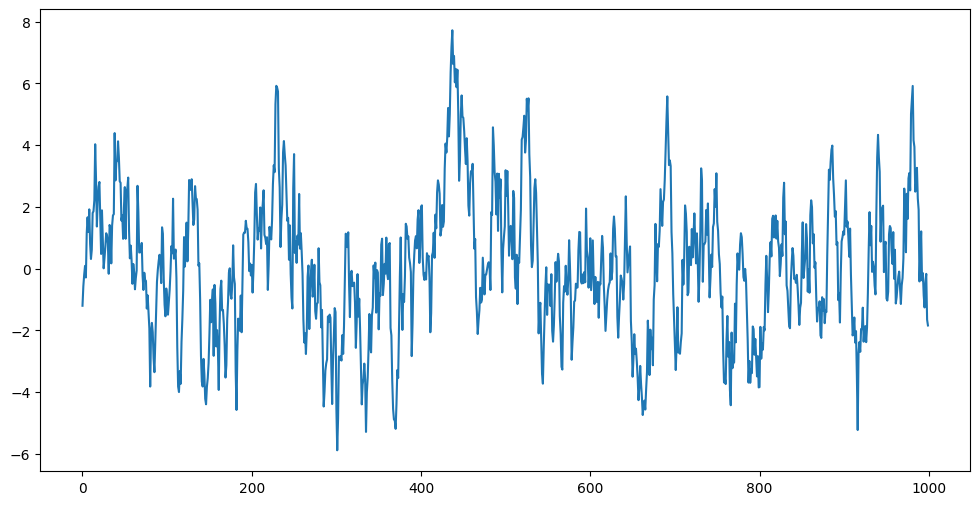

In [26]:
# Simulate data
ar1 = np.array([1, -0.9])  # 1 is the zero-lag coefficient, AR parameter = 0.9 becomes -0.9
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.show()

In [27]:
# Estimate params
mod = ARIMA(simulated_data_1, order=(1, 0, 0))
res = mod.fit()
print(res.summary())
print(f"The estimate of phi is: {res.params[1]}")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1405.035
Date:                Fri, 10 Jan 2025   AIC                           2816.070
Time:                        17:21:30   BIC                           2830.793
Sample:                             0   HQIC                          2821.666
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0381      0.291      0.131      0.896      -0.533       0.609
ar.L1          0.8932      0.014     62.133      0.000       0.865       0.921
sigma2         0.9710      0.042     22.851      0.0

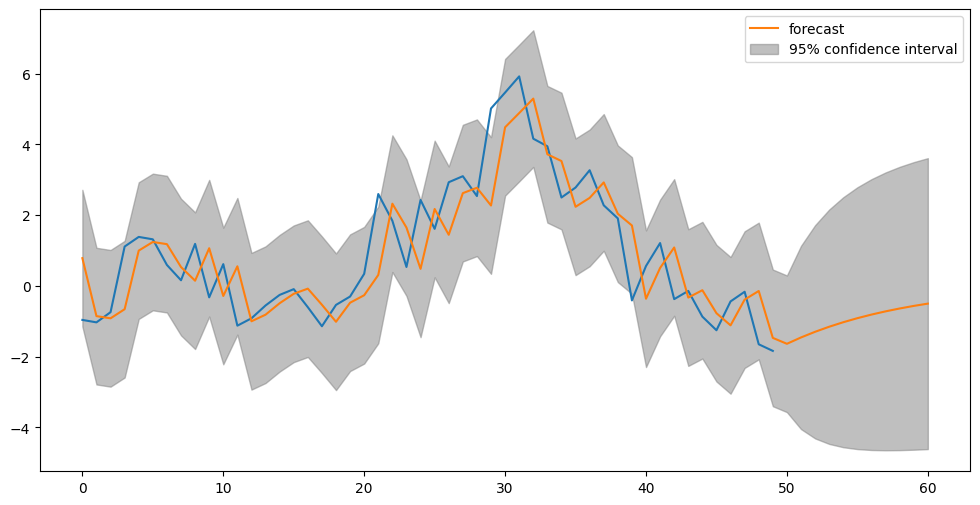

In [28]:
# Forecast
_, ax = plt.subplots()
ax.plot(simulated_data_1[950:])
plot_predict(res, start=950, end=1010, ax=ax)
plt.show()

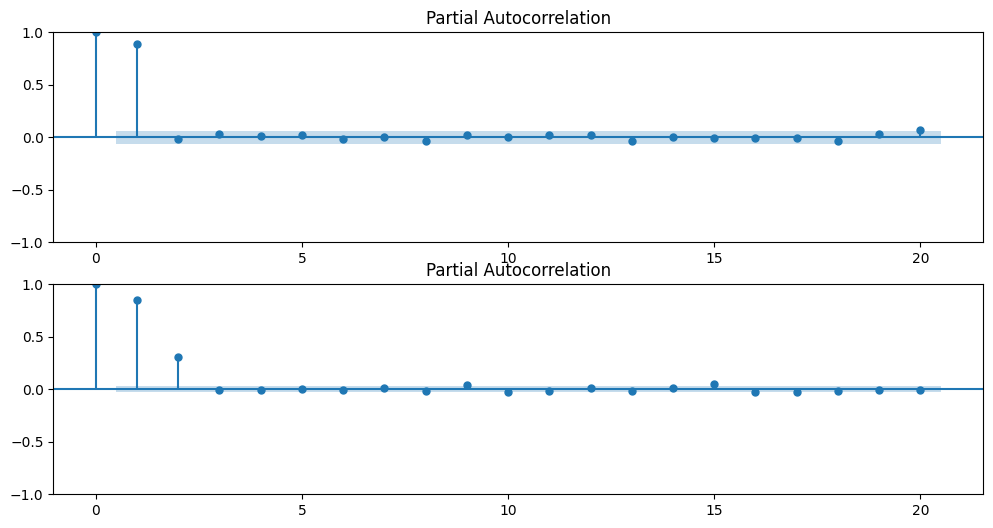

In [29]:
# Partial autocorrelation
fig, axes = plt.subplots(2, 1)
plot_pacf(simulated_data_1, lags=20, ax=axes[0])

# Simulate an AR(2) with phi1 = 0.6, phi2 = 0.3
ma_2 = np.array([1])
ar_2 = np.array([1, -0.6, -0.3])
ar_object_2 = ArmaProcess(ar_2, ma_2)
simulated_data_2 = ar_object_2.generate_sample(nsample=5000)

plot_pacf(simulated_data_2, lags=20, ax=axes[1])
plt.show()

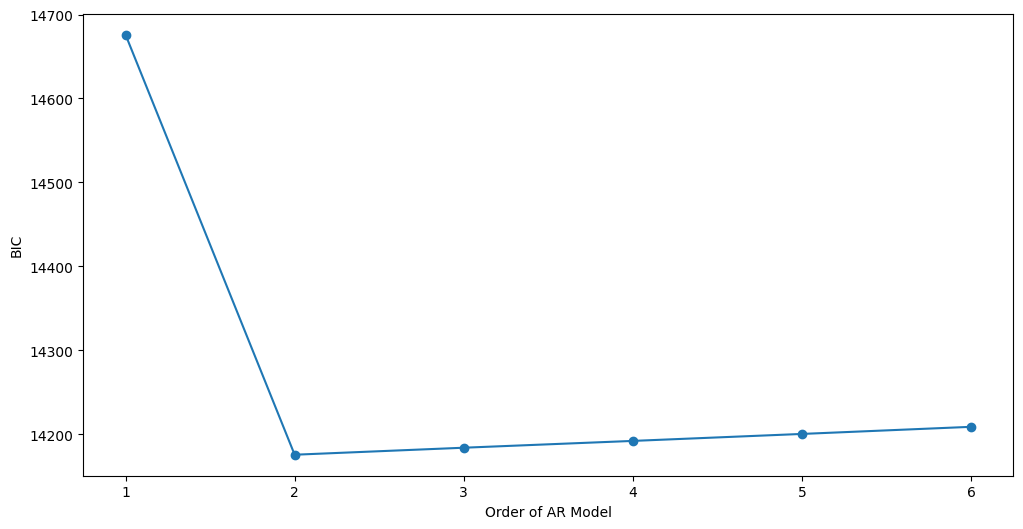

In [30]:
# Find the best order (i.e., number of lags)
# The Bayesian Information Criterion (BIC) includes a penalty for every additional lag
bic_values = np.zeros(7)
for p in range(7):
    mdl = ARIMA(simulated_data_2, order=(p, 0, 0))
    res = mdl.fit()
    bic_values[p] = res.bic

plt.plot(range(1, 7), bic_values[1:7], marker='o')  # exclude the zero lag model
plt.xlabel('Order of AR Model')
plt.ylabel('BIC')
plt.show()

# MA processes

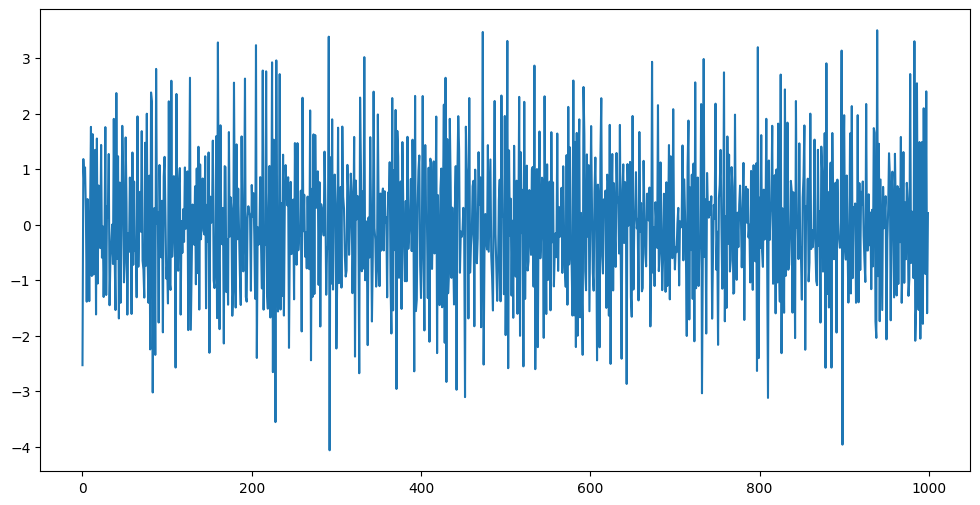

In [45]:
ar_1 = np.array([1])
ma_1 = np.array([1, -0.9])
ma_object_1 = ArmaProcess(ar_1, ma_1)
simulated_data_1 = ma_object_1.generate_sample(nsample=1000)
simulated_data_1 = pd.Series(simulated_data_1)
plt.plot(simulated_data_1)
plt.show()

In [51]:
# Fit an MA(1) model to the simulated data
mod = ARIMA(simulated_data_1, order=(0, 0, 1))
res = mod.fit()
print(res.summary())
print(f"Estimate of theta = {res.params['ma.L1']}")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1394.642
Date:                Fri, 10 Jan 2025   AIC                           2795.285
Time:                        17:27:39   BIC                           2810.008
Sample:                             0   HQIC                          2800.881
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.003     -0.180      0.857      -0.006       0.005
ma.L1         -0.9048      0.014    -66.836      0.000      -0.931      -0.878
sigma2         0.9509      0.043     22.313      0.0

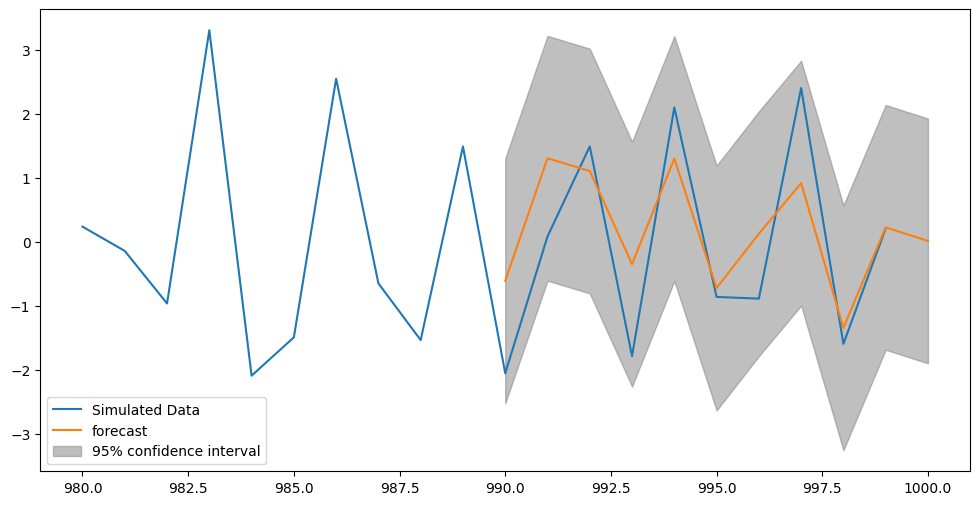

In [50]:
# Forecast with MA(1) model
fig, ax = plt.subplots()
ax.plot(simulated_data_1.iloc[980:], label="Simulated Data")
plot_predict(res, start=990, end=1000, ax=ax)
plt.show()

# Cointegration

In [ ]:
# Import the statsmodels module for regression and the adfuller function


# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC, ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b * ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])